In [1]:
# !pip install wordcloud, pandas, matplotlib, PIL
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [2]:
book_list2021 = {1:{'Name':"The richest man in Babylon", 'Author':"George S. Clason", 'Pages':224}
                 , 2:{'Name':"The slight edge", 'Author':"Jeff Olson", 'Pages':280}
                 , 3:{'Name':"Intermittent fasting basics", 'Author':"Lindsay Boyers", 'Pages':219}
                 , 4:{'Name':"The one thing", 'Author':"Gary Keller", 'Pages':240}
                 , 5:{'Name':"Who moved my cheese", 'Author':"Spencer Johnson", 'Pages':94}
                 , 6:{'Name':"Think and grow rich", 'Author':"Napoleon Hill", 'Pages':290}
                 , 7:{'Name':"Outwitting the devil: The secret to freedom and success", 'Author':"Napoleon Hill", 'Pages':302}
                 , 8:{'Name':"The four agreements", 'Author':"Don Miquel Ruiz", 'Pages':140}
                 , 9:{'Name':"Atomic habits", 'Author':"James Clear", 'Pages':298}
                 , 10:{'Name':"How to win friends and influence people", 'Author':"Dale Carnegie", 'Pages':250}
                 , 11:{'Name':"Trading in the zone", 'Author':"Mark Douglas", 'Pages':207}
                 , 12:{'Name':"Stone soup", 'Author':"Marcia Brown", 'Pages':52}
                 , 13:{'Name':"Rich dad's cashflow quadrant", 'Author':"Robert T. Kiyosaki", 'Pages':282}
                 , 14:{'Name':"A beginners guide to the stock market", 'Author':"Mathew R. Kratter", 'Pages':100}
                 , 15:{'Name':"Credit spread options for beginners", 'Author':"Freeman Publications", 'Pages':134}
                 , 16:{'Name':"Heart sick: Connecting the dots between hope, disappointment and healing", 'Author':"Conscious Core", 'Pages':107}
                 , 17:{'Name':"Thinking strategically: the competitive edge in business, politics and everyday life", 'Author':["Avinash K. Dixit", "Barry J. Nalebuff"], 'Pages':384}
                 , 18:{'Name':"Noise trading and illusory corrections in the US equity markets", 'Author':["Jennifer C. Bender", "Carol L. Osler", "David Simon"], 'Pages':47}
                }

In [3]:
BL21 = pd.DataFrame(book_list2021).transpose()
BL21

,Name,Author,Pages
1,The richest man in Babylon,George S. Clason,224
2,The slight edge,Jeff Olson,280
3,Intermittent fasting basics,Lindsay Boyers,219
4,The one thing,Gary Keller,240
5,Who moved my cheese,Spencer Johnson,94
6,Think and grow rich,Napoleon Hill,290
7,Outwitting the devil: The secret to freedom an...,Napoleon Hill,302
8,The four agreements,Don Miquel Ruiz,140
9,Atomic habits,James Clear,298
10,How to win friends and influence people,Dale Carnegie,250


In [5]:
pages_read21 = BL21['Pages'].sum()
print(f"Number of pages read in 2021: {pages_read21}")

Number of pages read in 2021: 3650


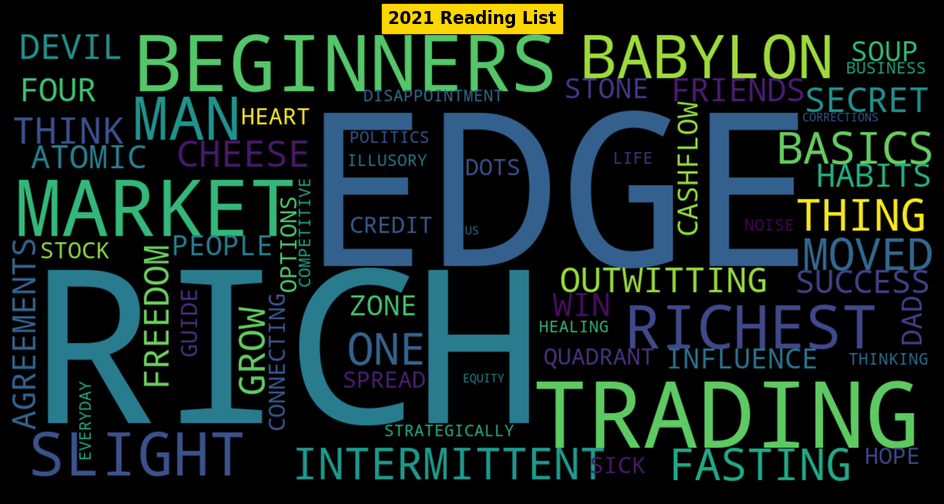

In [26]:
word_string=""

for book in BL21['Name']:
     word_string += (book.upper() + " ")

word_cloud = WordCloud(background_color='black',scale=3, collocations=True, normalize_plurals=True).generate(word_string)

plt.figure(figsize = (20,6), facecolor = 'black')
plt.imshow(word_cloud, interpolation = 'bessel')
plt.axis('off')
plt.title("2021 Reading List", fontweight='bold', color='black', backgroundcolor='gold')

plt.show()

In [7]:
book_list2022 = {1:{'Name':"The subtle art of not giving a F*ck", 'Author':"Mark Manson", 'Pages':206}
                 , 2:{'Name':"Why we sleep; unlocking the power of sleep and dreams", 'Author':"Mathew Walker", 'Pages':323}
                 , 3:{'Name':"Ingredients: the strgange chemistry of what we put in and on us", 'Author':"Goerge Zaidan", 'Pages':299}
                 , 4:{'Name':"We should all be millionaires", 'Author':"Rachel Rodgers", 'Pages':276}
                 , 5:{'Name':"The five love languages", 'Author':"Gary Chapman", 'Pages':272}
                 , 6:{'Name':"The art of saying NO", 'Author':"Damon Zahariades", 'Pages':160}
                 , 7:{'Name':"If you had controlling parents: How to make peace with your past and take your place in the world", 'Author':"Dan Neuharth", 'Pages':274}
                 , 8:{'Name':"Abundance beyond trauma", 'Author':"Jeannine L. Rashidi", 'Pages':169}
                 , 9:{'Name':"Dear Girl", 'Author':["Amy Krouse Rosenthal", "Paris Rosenthal"], 'Pages':40}
                }

In [8]:
BL22 = pd.DataFrame(book_list2022).transpose()
BL22

,Name,Author,Pages
1,The subtle art of not giving a F*ck,Mark Manson,206
2,Why we sleep; unlocking the power of sleep and...,Mathew Walker,323
3,Ingredients: the strgange chemistry of what we...,Goerge Zaidan,299
4,We should all be millionaires,Rachel Rodgers,276
5,The five love languages,Gary Chapman,272
6,The art of saying NO,Damon Zahariades,160
7,If you had controlling parents: How to make pe...,Dan Neuharth,274
8,Abundance beyond trauma,Jeannine L. Rashidi,169
9,Dear Girl,"[Amy Krouse Rosenthal, Paris Rosenthal]",40


In [9]:
pages_read22 = BL22['Pages'].sum()
print(f"Number of pages read in 2022: {pages_read22}")

Number of pages read in 2022: 2019


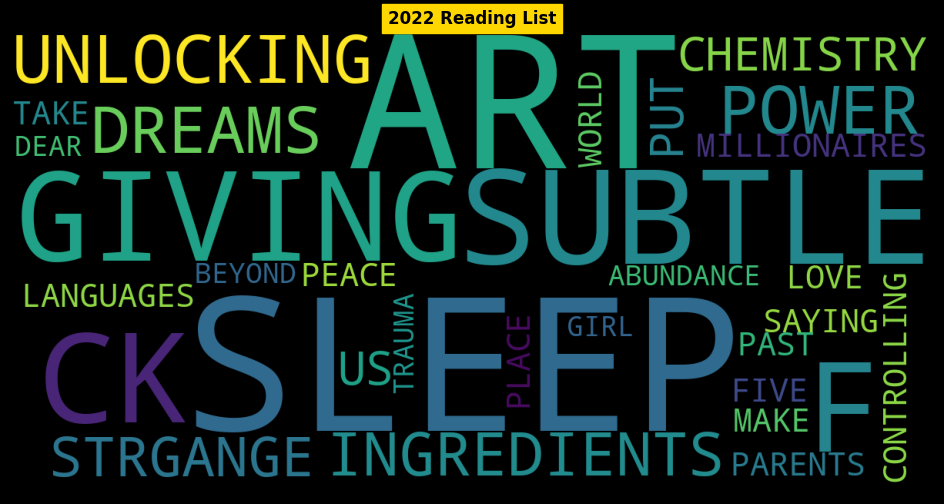

In [29]:
word_string=""

for book in BL22['Name']:
     word_string += (book.upper() + " ")

word_cloud = WordCloud(background_color='black',scale=3, collocations=True, normalize_plurals = True).generate(word_string)

plt.figure(figsize = (20,6), facecolor='black')
plt.imshow(word_cloud, interpolation = None)
plt.axis('off')
plt.title("2022 Reading List", fontweight='bold', color='black', backgroundcolor='gold')

plt.show()

In [16]:
comb_list = pd.concat([BL21, BL22]).sort_values(by='Name').set_index([pd.Index(range(1, len(BL21) + len(BL22) + 1))])
comb_list

,Name,Author,Pages
1,A beginners guide to the stock market,Mathew R. Kratter,100
2,Abundance beyond trauma,Jeannine L. Rashidi,169
3,Atomic habits,James Clear,298
4,Credit spread options for beginners,Freeman Publications,134
5,Dear Girl,"[Amy Krouse Rosenthal, Paris Rosenthal]",40
6,"Heart sick: Connecting the dots between hope, ...",Conscious Core,107
7,How to win friends and influence people,Dale Carnegie,250
8,If you had controlling parents: How to make pe...,Dan Neuharth,274
9,Ingredients: the strgange chemistry of what we...,Goerge Zaidan,299
10,Intermittent fasting basics,Lindsay Boyers,219


In [ ]:
pages_read21 = BL21['Pages'].sum()
print(f"Number of pages read in 2021: {pages_read21}")

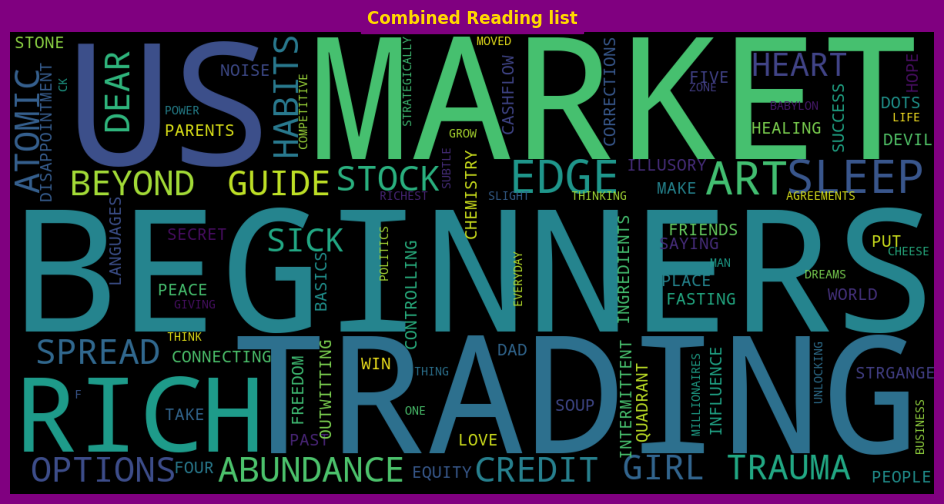

In [28]:
word_string=""

for book in comb_list['Name']:
     word_string = word_string + (book.upper() + " ")

word_cloud = WordCloud(background_color='black',scale=3, collocations=True, normalize_plurals=True).generate(word_string)

plt.figure(figsize = (20,6), facecolor='purple')
plt.imshow(word_cloud)
plt.axis('off')
plt.title("Combined Reading list", fontweight='bold', color='gold', backgroundcolor='purple')

plt.show()

Looking forward to more great reads in 2023.

🥳  MMⅩⅩⅢ  🥳